In [344]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import scipy.optimize as scopt

plt.ion()
plt.rcParams['figure.figsize'] = 8, 6

In [345]:
# solve the system dy/dt = f(y, t)
def f_demography(y, t, beta, gamma, birth, death):
    Si, Ii, Ri = tuple(y)
    # Si = y[0]
    # Ii = y[1]
    # Ri = y[2]
    # print(t)
    # SIR model equations
    # n = S+I+R
    # dS/dt = -beta * S * I - (S/n)*death
    # dI/dt = beta * S * I - gamma * I - (I/n)*death
    # dR/dt = gamma * I - (R/n)*death
    n = Si+Ii+Ri
    # Si = Si/n
    # Ii = Ii/n
    # Ri = Ri/n
    n = Si+Ii+Ri
    n = 1.0
    # Si = Si - (Si/n)*n*death + n*birth
    # Ii = Ii - (Ii/n)*n*death
    # Ri = Ri - (Ri/n)*n*death
    # + n*birth
    
    # the simple endemic equilibrium is when I = 0
    # endemic equilibrium is characterized by the fraction of
    # susceptibles in the population being the inverse of R0
    # with R0 = beta / (death + gamma)
    
    # the endemic equilibrium is stable if R0 > 1,
    # otherwise the disease-free equilibrium state is stable
    
    assert birth == death
    f0 = -beta*Si*Ii + n*birth - Si*death
    f1 = beta*Si*Ii - gamma*Ii - Ii*death
    f2 = gamma*Ii - Ri*death
    return [f0, f1, f2]

In [346]:
def plot_infections(
    y0, beta, gamma, birth, death,
    years = 10, resolution = 1000
):
    t = np.linspace(0, years, years * resolution)
    sol = scint.odeint(f_demography, y0, t, args=(beta, gamma, birth, death))
    S = sol[:, 0]
    I = sol[:, 1]
    R = sol[:, 2]
    assert np.allclose(sol.sum(axis=1), 1.)
    # print(sol.sum(axis=1))
    
    fig, ax = plt.subplots()
    # ax.plot(t, S, label='Susceptible')
    ax.plot(t, I, label='Infected')
    # ax.plot(t, R, label='Recovered')
    # ax.set_ylim(2.44*1e-4, 2.51*1e-4)
    # ax.set_ylim(0*e-4, 2.51*e-4)
    plt.xlabel('year')
    plt.ylabel('Population')
    plt.title('SIR for an endemic (beta=%.2f, gamma=%.2f, birth=%.2f, death=%.2f)' % (
        beta, gamma, birth, death
    ))
    plt.legend(loc=0)
    plt.show()

0.00025
[0.1, 0.00025, 0.89975]
beta 520.0 gamma 7.0 death 80.0
beta 520.0 gamma 52.14285714285714 death 0.0125
R0 9.970212620262267
0.0001844928993641042
0.00025


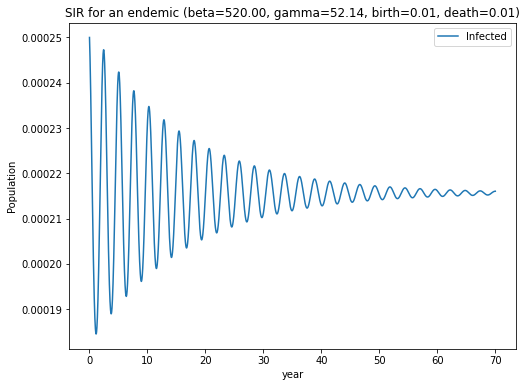

In [347]:
# initial conditions
I0 = 2.5*1e-4  # initial number of infected people
S0 = 0.1 # initial number of susceptible people
R0 = 1.0 - (I0 + S0) # initial number of recovered people
y0 = [S0, I0, R0] # initial condition vector

beta, gamma, death = 520.0, 1.0/(7.0/365.0), 1.0/(70.0)
print("beta", beta, "gamma", (1.0/gamma)*365.0, "death", 1.0/death)
print("beta", beta, "gamma", gamma, "death", death)
R0 = beta / (gamma + death)
print("R0", R0)
plot_infections(y0, beta, gamma, death, death, years=70, resolution=1_00)

In [337]:
import itertools
for beta, gamma, death in itertools.product(*[
    np.linspace(1.0, 3.0, 10),
    # [0.2],
    np.linspace(0.001, 0.01, 5),
    # [0.01],
    # np.linspace(0.01, 0.5, 5),
    # np.linspace(0, 3, 5),
    [1/(70*365)],
]):
    birth = death
    R0 = beta / ( gamma + death )
    print(R0)
    plot_infections(beta, gamma, birth, death, days=20*365, resolution=100)

962.3352165725048


TypeError: plot_infections() got an unexpected keyword argument 'days'

In [ ]:
# set the best params here
beta = 1.5 # rate of infection
gamma = 0.1  # rate of recovery
birth = 0.1 # natural birth rate
death = birth # natural death rate, keep the population size constant

In [ ]:
# this should oscillate
# beta*Si*Ii - gamma*Ii - (Ii/n)*n*death
# beta*Si*Ii - (Ii/n)*n*death
days = 360 * 5
resolution = 1000
t = np.linspace(0, days, days * resolution)
target_solution = 0.5 + 0.2 * np.sin(t*0.2)
# plt.figure()
# plt.plot(t, target_solution, label='Infected')
# plt.show()

def mse_error(params):
    beta, gamma, birth = params
    sol = scint.odeint(f, y0, t, args=(beta, gamma, birth, birth))[:,1]
    delta = (target_solution - sol)[30:]
    return np.sum(delta ** 2.0)

[ 9.72576275e+04+0.00000000e+00j -7.96182894e+01-5.45690783e+01j
 -9.13253645e+01-1.08266763e+02j ... -1.28335796e-01+2.20746512e-06j
 -1.28335798e-01+1.10331123e-06j -1.28335798e-01+0.00000000e+00j]
[ 0.00000000e+00  2.73972603e-06  5.47945205e-06 ... -8.21917808e-06
 -5.47945205e-06 -2.73972603e-06]


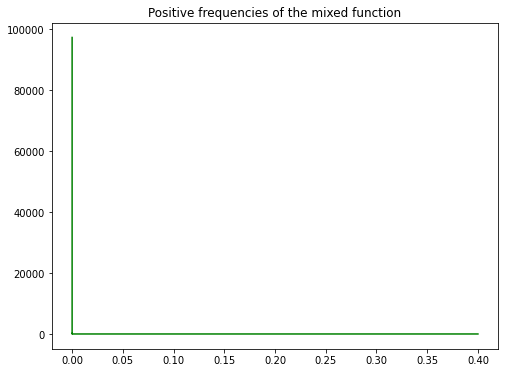

In [57]:
import scipy.fft

fourier = scipy.fft.rfft(I)
freqs = scipy.fft.fftfreq(len(I))
print(fourier)
print(freqs)

# sort frequencies & fourier together
freqs, fourier = zip(*sorted(zip(freqs, fourier)))
# index such to plot only positive frequencies
i_min = freqs.index(0)
i_max = freqs.index(0.4)

# plot only indices of positive frequencies
plt.plot(freqs[i_min:i_max], np.abs(np.real(fourier))[i_min:i_max], c='green')
plt.title("Positive frequencies of the mixed function")
plt.show()